In [ ]:
# Run once - installation of pandas-profiling 3.0.0
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# Run if needed - lightgbm and xboost installation
# pip install lightgbm
# pip install xgboost
# pip install graphviz

In [206]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import graphviz

In [2]:
# Double check - should be 3.0.0
pandas_profiling.version.__version__

'3.0.0'

In [3]:
# Column names
colnames = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "MaritalStatus",
            "Occupation", "Relationship", "Race", "Sex", "CapitalGain", "CapitalLoss", 
            "HoursPerWeek", "NativeCountry", "Target"]

In [6]:
# Loading in the data 
part_one = pd.read_csv("Data/adult.data", header = None, names = colnames )
part_two = pd.read_csv("Data/adult.test", header = None, names = colnames, skiprows = 1)

In [ ]:
df.Target = df.Target.replace(" <=50K", 0).replace(" >50K", 1)

In [14]:
part_one.Target = part_one.Target.replace(" <=50K", 0).replace(" >50K", 1)
part_two.Target = part_two.Target = part_two.Target.replace(" <=50K.", 0).replace(" >50K.", 1)

In [19]:
part_one.head(5)

Age          Workclass  Fnlwgt   Education  Education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

         MaritalStatus          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Target  
0         2174            0            40   United-States       0  
1            0            0            13   United-States       0  
2            0            0            40   United-States       0  
3            0            0            40   United-States       0  
4            0            0            40            Cuba       0

In [18]:
part_two.head(5)

Age   Workclass  Fnlwgt      Education  Education-num        MaritalStatus  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           Occupation Relationship    Race      Sex  CapitalGain  CapitalLoss  \
0   Machine-op-inspct    Own-child   Black     Male            0            0   
1     Farming-fishing      Husband   White     Male            0            0   
2     Protective-serv      Husband   White     Male            0            0   
3   Machine-op-inspct      Husband   Black     Male         7688            0   
4                   ?    Own-child   White   Female            0            0   

   HoursPerWeek   NativeCountry  Target  
0            40   United-States       0  
1            50   United-States       0  
2            40   United-States       1  
3            40   United-States       1  
4            30   United-States       0

In [21]:
df = pd.concat([part_one,part_two], axis=0)
df.head(5)

Age          Workclass  Fnlwgt   Education  Education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

         MaritalStatus          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Target  
0         2174            0            40   United-States       0  
1            0            0            13   United-States       0  
2            0            0            40   United-States       0  
3            0            0            40   United-States       0  
4            0            0            40            Cuba       0

In [31]:
df

Age         Workclass  Fnlwgt  Education  Education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
16276   39           Private  215419  Bachelors             13   
16277   64                 ?  321403    HS-grad              9   
16278   38           Private  374983  Bachelors             13   
16279   44           Private   83891  Bachelors             13   
16280   35      Self-emp-inc  182148  Bachelors             13   

            MaritalStatus         Occupation    Relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
16276            Divorced     Prof-specialty   Not-in-family   
16277             Widowed                  ?  Other-relative   
16278  Married-civ-spouse     Prof-specialty         Husband   
16279            Divorced       Adm-clerical       Own-child   
16280  Married-civ-spouse    Exec-managerial         Husband   

                     Race     Sex  CapitalGain  CapitalLoss  HoursPerWeek  \
0                   White    Male         2174            0            40   
1                   White    Male            0            0            13   
2                   White    Male            0            0            40   
3                   Black    Male            0            0            40   
4                   Black  Female            0            0            40   
...                   ...     ...          ...          ...           ...   
16276               White  Female            0            0            36   
16277               Black    Male            0            0            40   
16278               White    Male            0            0            50   
16279  Asian-Pac-Islander    Male         5455            0            40   
16280               White    Male            0            0            60   

       NativeCountry  Target  
0      United-States       0  
1      United-States       0  
2      United-States       0  
3      United-States       0  
4               Cuba       0  
...              ...     ...  
16276  United-States       0  
16277  United-States       0  
16278  United-States       0  
16279  United-States       0  
16280  United-States       1  

[48842 rows x 15 columns]

In [26]:
# Get the list of all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Remove all leading white spaces
for column in cat_columns:
    df[f"{column}"] = df[f"{column}"].str.strip()

# Turn them into categorical features
df[cat_columns] = df[cat_columns].astype('category')

df.dtypes

Age                 int64
Workclass        category
Fnlwgt              int64
Education        category
Education-num       int64
MaritalStatus    category
Occupation       category
Relationship     category
Race             category
Sex              category
CapitalGain         int64
CapitalLoss         int64
HoursPerWeek        int64
NativeCountry    category
Target              int64
dtype: object

In [30]:
# Query for all 3620 rows with " ?"
df[(df['Workclass'] == "?") | (df['Occupation'] == "?") | (df['NativeCountry'] == "?")]

Age  Workclass  Fnlwgt     Education  Education-num  \
14      40    Private  121772     Assoc-voc             11   
27      54          ?  180211  Some-college             10   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32          ?  293936       7th-8th              4   
...    ...        ...     ...           ...            ...   
16208   21          ?  212661  Some-college             10   
16239   73          ?  144872       HS-grad              9   
16251   81          ?   26711     Assoc-voc             11   
16265   50  Local-gov  139347       Masters             14   
16277   64          ?  321403       HS-grad              9   

               MaritalStatus      Occupation    Relationship  \
14        Married-civ-spouse    Craft-repair         Husband   
27        Married-civ-spouse               ?         Husband   
38        Married-civ-spouse           Sales         Husband   
51             Never-married   Other-service       Own-child   
61     Married-spouse-absent               ?   Not-in-family   
...                      ...             ...             ...   
16208          Never-married               ?       Own-child   
16239     Married-civ-spouse               ?         Husband   
16251     Married-civ-spouse               ?         Husband   
16265     Married-civ-spouse  Prof-specialty            Wife   
16277                Widowed               ?  Other-relative   

                     Race     Sex  CapitalGain  CapitalLoss  HoursPerWeek  \
14     Asian-Pac-Islander    Male            0            0            40   
27     Asian-Pac-Islander    Male            0            0            60   
38                  White    Male            0            0            38   
51                  White  Female            0            0            30   
61                  White    Male            0            0            40   
...                   ...     ...          ...          ...           ...   
16208               White  Female            0            0            30   
16239               White    Male            0            0            25   
16251               White    Male         2936            0            20   
16265               White  Female            0            0            40   
16277               Black    Male            0            0            40   

       NativeCountry  Target  
14                 ?       1  
27             South       1  
38                 ?       1  
51                 ?       0  
61                 ?       0  
...              ...     ...  
16208  United-States       0  
16239         Canada       0  
16251  United-States       0  
16265              ?       1  
16277  United-States       0  

[3620 rows x 15 columns]

In [28]:
# 7.4% (3620 entries) have ?, most of them in multiple columns
# 2799 ? values in Workclass, 2809 in Occupation(mostly same rows as WorkClass) and 857 in NativeCountry
(df == "?").sum()

Age                 0
Workclass        2799
Fnlwgt              0
Education           0
Education-num       0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     857
Target              0
dtype: int64

In [34]:
# Drop those rows
index_to_drop =  df[(df['Workclass'] == "?") | (df['Occupation'] == "?") | (df['NativeCountry'] == "?")].index
df.drop(index_to_drop, axis = 0, inplace= True)

In [35]:
df

Age         Workclass  Fnlwgt  Education  Education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
5       37           Private  284582    Masters             14   
...    ...               ...     ...        ...            ...   
16275   33           Private  245211  Bachelors             13   
16276   39           Private  215419  Bachelors             13   
16278   38           Private  374983  Bachelors             13   
16279   44           Private   83891  Bachelors             13   
16280   35      Self-emp-inc  182148  Bachelors             13   

            MaritalStatus         Occupation   Relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
5      Married-civ-spouse    Exec-managerial           Wife   
...                   ...                ...            ...   
16275       Never-married     Prof-specialty      Own-child   
16276            Divorced     Prof-specialty  Not-in-family   
16278  Married-civ-spouse     Prof-specialty        Husband   
16279            Divorced       Adm-clerical      Own-child   
16280  Married-civ-spouse    Exec-managerial        Husband   

                     Race     Sex  CapitalGain  CapitalLoss  HoursPerWeek  \
0                   White    Male         2174            0            40   
1                   White    Male            0            0            13   
2                   White    Male            0            0            40   
3                   Black    Male            0            0            40   
5                   White  Female            0            0            40   
...                   ...     ...          ...          ...           ...   
16275               White    Male            0            0            40   
16276               White  Female            0            0            36   
16278               White    Male            0            0            50   
16279  Asian-Pac-Islander    Male         5455            0            40   
16280               White    Male            0            0            60   

       NativeCountry  Target  
0      United-States       0  
1      United-States       0  
2      United-States       0  
3      United-States       0  
5      United-States       0  
...              ...     ...  
16275  United-States       0  
16276  United-States       0  
16278  United-States       0  
16279  United-States       0  
16280  United-States       1  

[42960 rows x 15 columns]

In [36]:
# Check for duplicate rows
df[df.duplicated(keep=False)].sort_values(["Age", "Fnlwgt"])

Age         Workclass  Fnlwgt     Education  Education-num  \
17673   19           Private   97261       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
3118    19           Private  130431       5th-6th              3   
1668    19           Private  130431       5th-6th              3   
6990    19           Private  138153  Some-college             10   
...    ...               ...     ...           ...            ...   
21875   49           Private   31267       7th-8th              4   
7053    49  Self-emp-not-inc   43479  Some-college             10   
22494   49  Self-emp-not-inc   43479  Some-college             10   
2303    90           Private   52386  Some-college             10   
5104    90           Private   52386  Some-college             10   

            MaritalStatus       Occupation   Relationship                Race  \
17673       Never-married  Farming-fishing  Not-in-family               White   
18698       Never-married  Farming-fishing  Not-in-family               White   
3118        Never-married  Farming-fishing  Not-in-family               White   
1668        Never-married  Farming-fishing  Not-in-family               White   
6990        Never-married     Adm-clerical      Own-child               White   
...                   ...              ...            ...                 ...   
21875  Married-civ-spouse     Craft-repair        Husband               White   
7053   Married-civ-spouse     Craft-repair        Husband               White   
22494  Married-civ-spouse     Craft-repair        Husband               White   
2303        Never-married    Other-service  Not-in-family  Asian-Pac-Islander   
5104        Never-married    Other-service  Not-in-family  Asian-Pac-Islander   

          Sex  CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry  Target  
17673    Male            0            0            40  United-States       0  
18698    Male            0            0            40  United-States       0  
3118     Male            0            0            36         Mexico       0  
1668     Male            0            0            36         Mexico       0  
6990   Female            0            0            10  United-States       0  
...       ...          ...          ...           ...            ...     ...  
21875    Male            0            0            40  United-States       0  
7053     Male            0            0            40  United-States       0  
22494    Male            0            0            40  United-States       0  
2303     Male            0            0            35  United-States       0  
5104     Male            0            0            35  United-States       0  

[80 rows x 15 columns]

In [37]:
# 41 duplicate rows to be removed
df[df.duplicated()].shape[0]

41

In [38]:
# Drop the duplicates and reset the index
df.drop_duplicates(keep = 'first', inplace = True)
df.reset_index(drop=True, inplace= True)

In [39]:
# We are left with 42919 x 15 dataframe
df

Age         Workclass  Fnlwgt  Education  Education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       37           Private  284582    Masters             14   
...    ...               ...     ...        ...            ...   
42914   33           Private  245211  Bachelors             13   
42915   39           Private  215419  Bachelors             13   
42916   38           Private  374983  Bachelors             13   
42917   44           Private   83891  Bachelors             13   
42918   35      Self-emp-inc  182148  Bachelors             13   

            MaritalStatus         Occupation   Relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse    Exec-managerial           Wife   
...                   ...                ...            ...   
42914       Never-married     Prof-specialty      Own-child   
42915            Divorced     Prof-specialty  Not-in-family   
42916  Married-civ-spouse     Prof-specialty        Husband   
42917            Divorced       Adm-clerical      Own-child   
42918  Married-civ-spouse    Exec-managerial        Husband   

                     Race     Sex  CapitalGain  CapitalLoss  HoursPerWeek  \
0                   White    Male         2174            0            40   
1                   White    Male            0            0            13   
2                   White    Male            0            0            40   
3                   Black    Male            0            0            40   
4                   White  Female            0            0            40   
...                   ...     ...          ...          ...           ...   
42914               White    Male            0            0            40   
42915               White  Female            0            0            36   
42916               White    Male            0            0            50   
42917  Asian-Pac-Islander    Male         5455            0            40   
42918               White    Male            0            0            60   

       NativeCountry  Target  
0      United-States       0  
1      United-States       0  
2      United-States       0  
3      United-States       0  
4      United-States       0  
...              ...     ...  
42914  United-States       0  
42915  United-States       0  
42916  United-States       0  
42917  United-States       0  
42918  United-States       1  

[42919 rows x 15 columns]

In [40]:
# Create pandas profiling report
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Dropping Fnlwgt and Education columns
df.drop("Fnlwgt", axis = 1, inplace = True)
df.drop("Education", axis = 1, inplace = True)

In [42]:
df

Age         Workclass  Education-num       MaritalStatus  \
0       39         State-gov             13       Never-married   
1       50  Self-emp-not-inc             13  Married-civ-spouse   
2       38           Private              9            Divorced   
3       53           Private              7  Married-civ-spouse   
4       37           Private             14  Married-civ-spouse   
...    ...               ...            ...                 ...   
42914   33           Private             13       Never-married   
42915   39           Private             13            Divorced   
42916   38           Private             13  Married-civ-spouse   
42917   44           Private             13            Divorced   
42918   35      Self-emp-inc             13  Married-civ-spouse   

              Occupation   Relationship                Race     Sex  \
0           Adm-clerical  Not-in-family               White    Male   
1        Exec-managerial        Husband               White    Male   
2      Handlers-cleaners  Not-in-family               White    Male   
3      Handlers-cleaners        Husband               Black    Male   
4        Exec-managerial           Wife               White  Female   
...                  ...            ...                 ...     ...   
42914     Prof-specialty      Own-child               White    Male   
42915     Prof-specialty  Not-in-family               White  Female   
42916     Prof-specialty        Husband               White    Male   
42917       Adm-clerical      Own-child  Asian-Pac-Islander    Male   
42918    Exec-managerial        Husband               White    Male   

       CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry  Target  
0             2174            0            40  United-States       0  
1                0            0            13  United-States       0  
2                0            0            40  United-States       0  
3                0            0            40  United-States       0  
4                0            0            40  United-States       0  
...            ...          ...           ...            ...     ...  
42914            0            0            40  United-States       0  
42915            0            0            36  United-States       0  
42916            0            0            50  United-States       0  
42917         5455            0            40  United-States       0  
42918            0            0            60  United-States       1  

[42919 rows x 13 columns]

In [43]:
# Get the list of all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Remove all leading white spaces
for column in cat_columns:
    df[f"{column}"] = df[f"{column}"].str.strip()

# Turn them into categorical features
df[cat_columns] = df[cat_columns].astype('category')

In [44]:
df.dtypes

Age                 int64
Workclass        category
Education-num       int64
MaritalStatus    category
Occupation       category
Relationship     category
Race             category
Sex              category
CapitalGain         int64
CapitalLoss         int64
HoursPerWeek        int64
NativeCountry    category
Target              int64
dtype: object

MACHINE LEARNING

In [226]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = 0.30,
                                                    stratify = y, random_state = 2021)

X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size = 0.50,
                                                    stratify = y_valtest, random_state = 2021)

LIGHTGBM

In [227]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

In [228]:
cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[4539  300]
 [ 543 1056]]

True Positives(TP) =  4539

True Negatives(TN) =  1056

False Positives(FP) =  300

False Negatives(FN) =  543


Accuracy:  0.8690587138863001


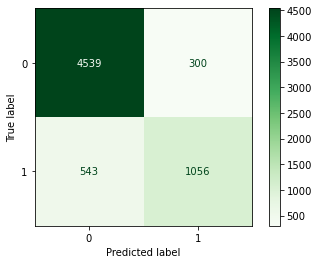

In [97]:
score1=accuracy_score(y_val,y_pred)
print("Accuracy: ", score1)
plot_confusion_matrix(clf, X_val, y_val, cmap='Greens')
plt.show()

In [98]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4839
           1       0.78      0.66      0.71      1599

    accuracy                           0.87      6438
   macro avg       0.84      0.80      0.81      6438
weighted avg       0.86      0.87      0.87      6438



In [52]:
varimp = pd.DataFrame({'Feature' : X.columns, 'Importance': clf.feature_importances_})
varimp.sort_values(by = 'Importance', ascending= False)

Feature  Importance
0             Age         703
8     CapitalGain         450
10   HoursPerWeek         428
9     CapitalLoss         388
2   Education-num         347
4      Occupation         212
11  NativeCountry         107
1       Workclass         103
7             Sex          76
3   MaritalStatus          73
5    Relationship          72
6            Race          41

In [179]:
val_f1_max_depth=[]
train_f1_max_depth=[]
val_range=(1,26,1)

for i in range(val_range[0],val_range[1],val_range[2]):
    clf = lgb.LGBMClassifier(max_depth = i)
    clf.fit(X_train, y_train)
    pred_val = clf.predict(X_val)
    pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_f1_max_depth.append(f1_train)
    val_f1_max_depth.append(f1_val)

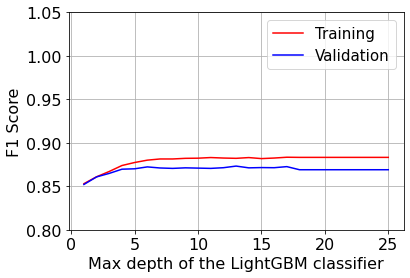

In [180]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_max_depth,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the LightGBM classifier", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
plt.ylim(0.8,1.05)
plt.show()

DECISION TREE

In [181]:
df_dummy = pd.get_dummies(df)
df_dummy

Age  Education-num  CapitalGain  CapitalLoss  HoursPerWeek  Target  \
0       39             13         2174            0            40       0   
1       50             13            0            0            13       0   
2       38              9            0            0            40       0   
3       53              7            0            0            40       0   
4       37             14            0            0            40       0   
...    ...            ...          ...          ...           ...     ...   
42914   33             13            0            0            40       0   
42915   39             13            0            0            36       0   
42916   38             13            0            0            50       0   
42917   44             13         5455            0            40       0   
42918   35             13            0            0            60       1   

       Workclass_?  Workclass_Federal-gov  Workclass_Local-gov  \
0                0                      0                    0   
1                0                      0                    0   
2                0                      0                    0   
3                0                      0                    0   
4                0                      0                    0   
...            ...                    ...                  ...   
42914            0                      0                    0   
42915            0                      0                    0   
42916            0                      0                    0   
42917            0                      0                    0   
42918            0                      0                    0   

       Workclass_Never-worked  ...  NativeCountry_Portugal  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   
...                       ...  ...                     ...   
42914                       0  ...                       0   
42915                       0  ...                       0   
42916                       0  ...                       0   
42917                       0  ...                       0   
42918                       0  ...                       0   

       NativeCountry_Puerto-Rico  NativeCountry_Scotland  NativeCountry_South  \
0                              0                       0                    0   
1                              0                       0                    0   
2                              0                       0                    0   
3                              0                       0                    0   
4                              0                       0                    0   
...                          ...                     ...                  ...   
42914                          0                       0                    0   
42915                          0                       0                    0   
42916                          0                       0                    0   
42917                          0                       0                    0   
42918                          0                       0                    0   

       NativeCountry_Taiwan  NativeCountry_Thailand  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
...                     ...                     ...   
42914                     0                       0   
42915                     0                       0   
42916                     0                       0   
42917                

In [182]:
X_dummy = df_dummy.drop('Target', axis = 1)
y_dummy = df_dummy['Target']


X_train_dummy, X_valtest_dummy, y_train_dummy, y_valtest_dummy = train_test_split(X_dummy, y_dummy, test_size = 0.30,
                                                    stratify = y_dummy, random_state = 2021)

X_val_dummy, X_test_dummy, y_val_dummy, y_test_dummy = train_test_split(X_valtest_dummy, y_valtest_dummy, test_size = 0.50,
                                                    stratify = y_valtest, random_state = 2021)

Accuracy:  0.8504193849021435


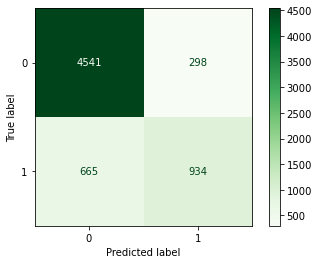

In [161]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=6)
dtree.fit(X_train_dummy,y_train_dummy)
predictions = dtree.predict(X_val_dummy)
score1=accuracy_score(y_val_dummy,predictions)
print("Accuracy: ", score1)
plot_confusion_matrix(dtree, X_val_dummy, y_val_dummy, cmap='Greens')
plt.show()

In [162]:
print(classification_report(y_val_dummy, predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4839
           1       0.76      0.58      0.66      1599

    accuracy                           0.85      6438
   macro avg       0.82      0.76      0.78      6438
weighted avg       0.84      0.85      0.84      6438



In [163]:
val_f1_max_depth=[]
train_f1_max_depth=[]
val_range=(1,41,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(X_train_dummy,y_train_dummy)
    pred_train = dtree.predict(X_train_dummy)
    pred_val = dtree.predict(X_val_dummy)
    f1_train = f1_score(y_train_dummy,pred_train,average='micro')
    f1_val = f1_score(y_val_dummy,pred_val,average='micro')
    train_f1_max_depth.append(f1_train)
    val_f1_max_depth.append(f1_val)

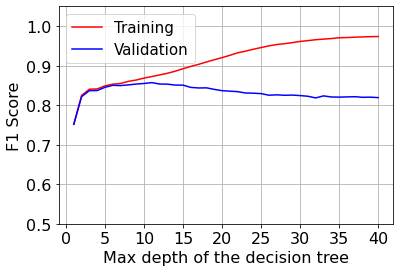

In [164]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_max_depth,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

In [121]:
val_f1_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
val_range=(1,41,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_leaf=i)
    dtree.fit(X_train_dummy,y_train_dummy)
    pred_train = dtree.predict(X_train_dummy)
    pred_val = dtree.predict(X_val_dummy)
    f1_train = f1_score(y_train_dummy,pred_train,average='micro')
    f1_val = f1_score(y_val_dummy,pred_val,average='micro')
    train_f1_min_samples_leaf.append(f1_train)
    val_f1_min_samples_leaf.append(f1_val)

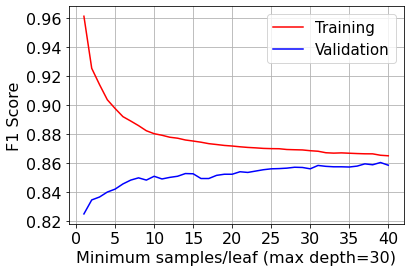

In [123]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_min_samples_leaf,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=30)", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
#plt.ylim(0.7,1.0)
plt.show()

In [156]:
val_f1_min_samples_split=[]
train_f1_min_samples_split=[]

val_range=(2,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_split=i)
    dtree.fit(X_train_dummy,y_train_dummy)
    pred_train = dtree.predict(X_train_dummy)
    pred_val = dtree.predict(X_val_dummy)
    f1_train = f1_score(y_train_dummy,pred_train,average='micro')
    f1_val = f1_score(y_val_dummy,pred_val,average='micro')
    train_f1_min_samples_split.append(f1_train)
    val_f1_min_samples_split.append(f1_val)
    
    

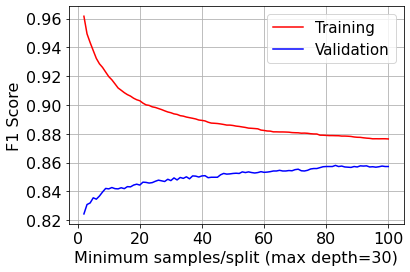

In [157]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_min_samples_split,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_min_samples_split,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/split (max depth=30)", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
#plt.ylim(0.7,1.0)
plt.show()

In [170]:
X = df_dummy.drop('Target', axis = 1)
y = df_dummy['Target']

X_train_dummy, X_val_dummy, y_train_dummy, y_val_dummy = train_test_split(X, y, test_size = 0.20,
                                                    stratify = y, random_state = 2021)

new_df = X_train_dummy.copy()
new_df['Target'] = y_train_dummy

############ RE DO ###########
val_f1_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)

for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=5)
    # Sampling
    df_sampled = new_df.sample(frac=percentage)
    X_train_sampled = df_sampled.drop('Target',axis=1)
    y_train_sampled = df_sampled['Target']
    # Fitting and Predictions
    dtree.fit(X_train_sampled,y_train_sampled)
    pred_train = dtree.predict(X_train_sampled)
    pred_val = dtree.predict(X_val_dummy)
    # F1 score
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    f1_val = f1_score(y_val_dummy,pred_val,average='micro')
    # Appending to the lists
    train_f1_train_size.append(f1_train)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


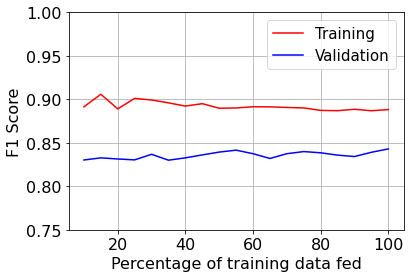

In [171]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
plt.ylim(0.75,1.0)
plt.show()

KNN

In [165]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummy)
X_val_scaled = scaler.transform(X_val_dummy)

0.8269648959304132


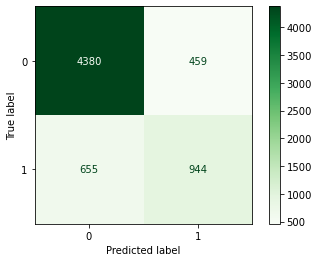

In [167]:
knn=KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train_dummy)
predictions=knn.predict(X_val_scaled)
score1=accuracy_score(y_val_dummy,predictions)
print(score1)
plot_confusion_matrix(knn, X_val_scaled, y_val_dummy, cmap='Greens')
plt.show()

In [168]:
print(classification_report(y_val_dummy, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4839
           1       0.67      0.59      0.63      1599

    accuracy                           0.83      6438
   macro avg       0.77      0.75      0.76      6438
weighted avg       0.82      0.83      0.82      6438



In [140]:
val_f1_k=[]
train_f1_k=[]

val_range=(1,11,1)

for i in range(val_range[0],val_range[1],val_range[2]):
    
    # Fitting
    knn=KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train_dummy)
    pred_train = knn.predict(X_train_scaled)
    pred_val = knn.predict(X_val_scaled)
    
    # F1 score
    f1_train = f1_score(y_train_dummy, pred_train,average='micro')
    f1_val = f1_score(y_val_dummy, pred_val,average='micro')
    
    # Appending to the lists
    train_f1_k.append(f1_train)
    val_f1_k.append(f1_val)
    print(f"Done for number of neighbors: {i}")

Done for number of neighbors: 1
Done for number of neighbors: 2
Done for number of neighbors: 3
Done for number of neighbors: 4
Done for number of neighbors: 5
Done for number of neighbors: 6
Done for number of neighbors: 7
Done for number of neighbors: 8
Done for number of neighbors: 9
Done for number of neighbors: 10


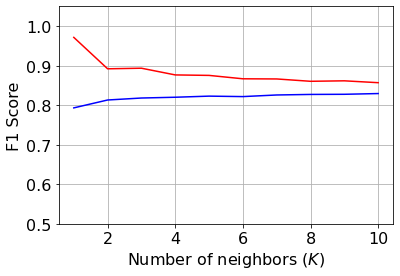

In [141]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_k,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_k,c='blue')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neighbors ($K$)", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
plt.ylim(0.5,1.05)
plt.show()

In [145]:
val_f1_train_size=[]
train_f1_train_size=[]
val_range=(10,101,5)


X = df_dummy.drop('Target', axis = 1)
y = df_dummy['Target']

X_train_dummy, X_val_dummy, y_train_dummy, y_val_dummy = train_test_split(X, y, test_size = 0.20,
                                                    stratify = y, random_state = 2021)

new_df = X_train_dummy.copy()
new_df['Target'] = y_train_dummy


for i in range(val_range[0],val_range[1],val_range[2]):
   
    # Preparations
    percentage=i*0.01
    knn=KNeighborsClassifier(5)
    scaler = StandardScaler()
    
   # Sampling
    df_sampled = new_df.sample(frac=percentage)
    X_train_sampled = df_sampled.drop('Target',axis=1)
    y_train_sampled = df_sampled['Target']
    
    # Scaling
    X_train_sampled_scaled = scaler.fit_transform(X_train_sampled)
    X_val_scaled = scaler.transform(X_val_dummy)
    
    # Fitting and prediction
    knn.fit(X_train_sampled_scaled, y_train_sampled)
    pred_train = knn.predict(X_train_sampled_scaled)
    pred_val = knn.predict(X_val_scaled)
    
    # F1 score
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    f1_val = f1_score(y_val_dummy,pred_val,average='micro')
    
    # Appending to the lists
    train_f1_train_size.append(f1_train)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


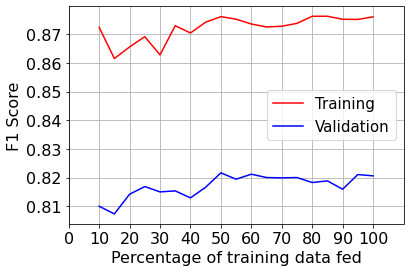

In [146]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_f1_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_f1_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("F1 Score",fontsize=16)
#plt.ylim(0.7,0.9)
plt.xlim(0,110)
plt.show()

In [195]:
dtrain = xgb.DMatrix(X_train_dummy, label = y_train_dummy)
deval = xgb.DMatrix(X_val_dummy, label = y_val_dummy)
dtest = xgb.DMatrix(X_test_dummy, label = y_test_dummy)

In [198]:
num_round = 100
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [201]:
bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval=10)

[0]	eval-auc:0.82664	train-auc:0.83043
[10]	eval-auc:0.90095	train-auc:0.90848
[20]	eval-auc:0.91365	train-auc:0.91967
[30]	eval-auc:0.91995	train-auc:0.92521
[40]	eval-auc:0.92417	train-auc:0.92784
[50]	eval-auc:0.92429	train-auc:0.92904
[60]	eval-auc:0.92469	train-auc:0.93081
[70]	eval-auc:0.92523	train-auc:0.93173
[80]	eval-auc:0.92603	train-auc:0.93259
[90]	eval-auc:0.92679	train-auc:0.93332
[99]	eval-auc:0.92692	train-auc:0.93393


In [208]:
ypred = bst.predict(deval)

In [211]:
bst.get_score()

{'MaritalStatus_Married-civ-spouse': 14,
 'CapitalGain': 50,
 'Education-num': 29,
 'Age': 41,
 'CapitalLoss': 43,
 'HoursPerWeek': 26,
 'Occupation_Exec-managerial': 3,
 'Workclass_Self-emp-not-inc': 6,
 'Relationship_Wife': 5,
 'Occupation_Other-service': 1,
 'Occupation_Farming-fishing': 2,
 'Relationship_Not-in-family': 6,
 'Workclass_Federal-gov': 2,
 'Race_Black': 4,
 'Occupation_Tech-support': 2,
 'Occupation_Prof-specialty': 4,
 'Occupation_Sales': 3,
 'Occupation_Protective-serv': 1,
 'Sex_Female': 6,
 'Occupation_Handlers-cleaners': 1,
 'NativeCountry_United-States': 2,
 'MaritalStatus_Never-married': 4,
 'Workclass_State-gov': 1,
 'Race_Amer-Indian-Eskimo': 2,
 'Occupation_Machine-op-inspct': 1,
 'MaritalStatus_Widowed': 2,
 'MaritalStatus_Married-AF-spouse': 2,
 'NativeCountry_Canada': 1,
 'Relationship_Unmarried': 1,
 'MaritalStatus_Married-spouse-absent': 1,
 'Workclass_Local-gov': 1,
 'Workclass_Self-emp-inc': 1,
 'Relationship_Other-relative': 1,
 'NativeCountry_Columbi

In [216]:
ypred[3]

6.134734e-05

BEST MODEL

In [232]:
clf = lgb.LGBMClassifier()

X_full_train = pd.concat([X_train, X_val], axis = 0)
y_full_train = pd.concat([y_train, y_val])

clf.fit(X_full_train, y_full_train)
y_pred = clf.predict(X_test)

In [233]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[4551  289]
 [ 578 1020]]

True Positives(TP) =  4551

True Negatives(TN) =  1020

False Positives(FP) =  289

False Negatives(FN) =  578


Accuracy:  0.8653308480894688


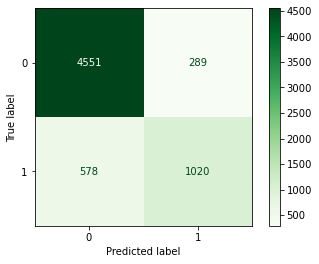

In [234]:
score1=accuracy_score(y_test,y_pred)
print("Accuracy: ", score1)
plot_confusion_matrix(clf, X_test, y_test, cmap='Greens')
plt.show()

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4840
           1       0.78      0.64      0.70      1598

    accuracy                           0.87      6438
   macro avg       0.83      0.79      0.81      6438
weighted avg       0.86      0.87      0.86      6438

